In [1]:
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

In [2]:
az.style.use('arviz-darkgrid')

In [3]:
np.random.seed(42)
true_mean=10
data=np.random.normal(true_mean,2,100)

In [4]:
data

array([10.99342831,  9.7234714 , 11.29537708, 13.04605971,  9.53169325,
        9.53172609, 13.15842563, 11.53486946,  9.06105123, 11.08512009,
        9.07316461,  9.06854049, 10.48392454,  6.17343951,  6.55016433,
        8.87542494,  7.97433776, 10.62849467,  8.18395185,  7.1753926 ,
       12.93129754,  9.5484474 , 10.13505641,  7.15050363,  8.91123455,
       10.22184518,  7.69801285, 10.75139604,  8.79872262,  9.4166125 ,
        8.79658678, 13.70455637,  9.97300555,  7.88457814, 11.64508982,
        7.5583127 , 10.41772719,  6.08065975,  7.3436279 , 10.39372247,
       11.47693316, 10.34273656,  9.76870344,  9.39779261,  7.04295602,
        8.56031158,  9.07872246, 12.11424445, 10.68723658,  6.47391969,
       10.64816794,  9.22983544,  8.646156  , 11.22335258, 12.06199904,
       11.86256024,  8.32156495,  9.38157525, 10.66252686, 11.95109025,
        9.04165152,  9.62868205,  7.78733005,  7.60758675, 11.62505164,
       12.71248006,  9.85597976, 12.0070658 , 10.72327205,  8.70

In [6]:
with pm.Model() as model:
    mean=pm.Normal('mean', mu=0,sd=10)
    sd=pm.HalfNormal('sd',2)
    obs = pm.Normal('obs',mu=mean,sd=sd, observed=data)
    trace=pm.sample(1000,tune=1000)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mean]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 36 seconds.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


In [8]:
with model:
    ppc=pm.sample_posterior_predictive(trace, samples=100,model=model)
    

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


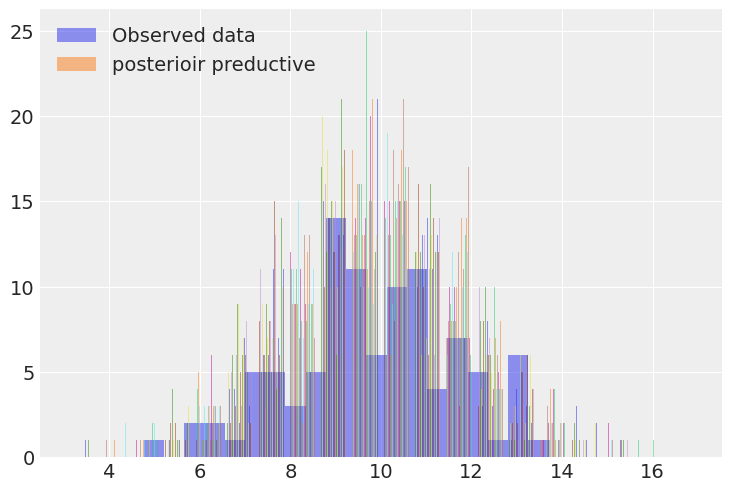

In [12]:
plt.hist(data, bins=20,alpha=0.5,label='Observed data')
plt.hist(ppc['obs'],bins=20,alpha=0.5,label='posterioir preductive')
plt.legend()
plt.show()


In [15]:
obs_statistic=np.mean(data)
ppc_statistic=np.mean(ppc['obs'], axis=0)
bayesian_p_value=np.mean(ppc_statistic > obs_statistic)
print("Bayesian p-value" , bayesian_p_value)

Bayesian p-value 0.59


In [16]:
#-----------------------------------------------------------------------
# Dummy CSV
#------------------------------------------------------------------------

Text(0, 0.5, 'y')

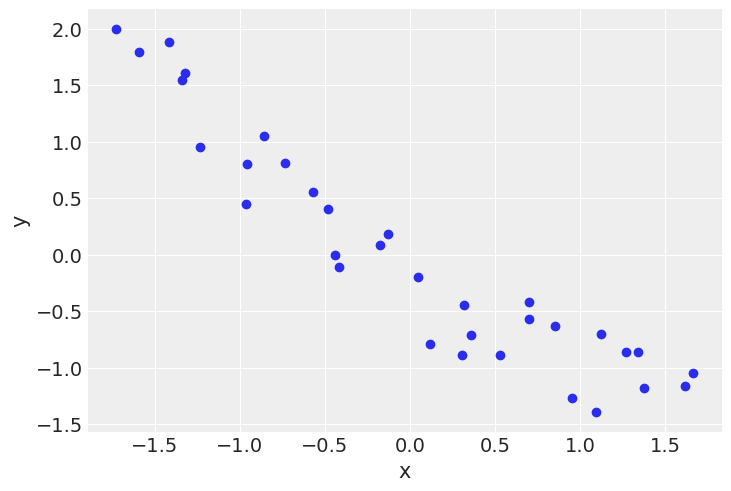

In [20]:
dummy=np.loadtxt("C:/Users/Talha/Downloads/dummy.csv")
x_1=dummy[:,0]
y_1=dummy[:,1]
order=2
x_1p=np.vstack([x_1**i for i in range(1,order+1)])
x_1s=(x_1p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)
y_1s=(y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0],y_1s)
plt.xlabel('x')
plt.ylabel('y')

In [25]:
with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10)
    ϵ = pm.HalfNormal('ϵ', 5)
    μ = α + β * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)
    idata_l = pm.sample(2000)


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 35 seconds.


In [23]:
with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10, shape=order)
    ϵ = pm.HalfNormal('ϵ', 5)
    μ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)
    idata_p = pm.sample(2000)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 46 seconds.


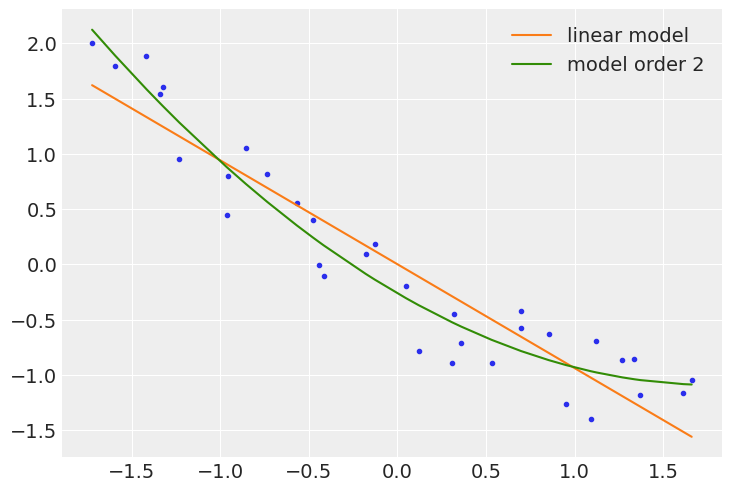

In [29]:
x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_l_post = idata_l['α'].mean()
β_l_post = idata_l['β'].mean(axis=0)
y_l_post = α_l_post + β_l_post * x_new
plt.plot(x_new, y_l_post, 'C1', label='linear model')
α_p_post = idata_p['α'].mean()
β_p_post = idata_p['β'].mean(axis=0)
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()


In [31]:
y_1 = pm.sample_posterior_predictive(idata_l, 2000 ,model=model_l)['y_pred']
y_p = pm.sample_posterior_predictive(idata_p, 2000 ,model=model_p)['y_pred']

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


([], [])

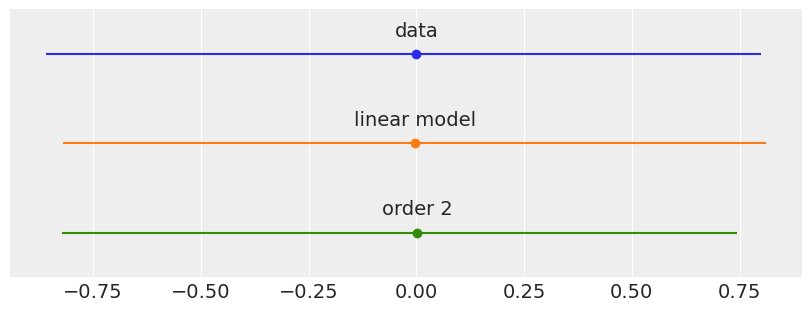

In [33]:
plt.figure(figsize=(8, 3))
data = [y_1s, y_1, y_p]
labels = ['data', 'linear model', 'order 2']
for i, d in enumerate(data):
    mean = d.mean()
    err = np.percentile(d, [25, 75])
    plt.errorbar(mean, -i, xerr=[[-err[0]], [err[1]]], fmt='o')
    plt.text(mean, -i+0.2, labels[i], ha='center', fontsize=14)
plt.ylim([-i-0.5, 0.5])
plt.yticks([])


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


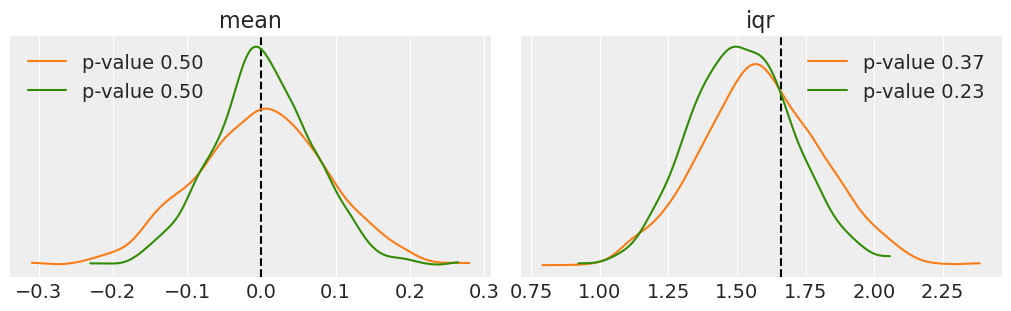

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)

def iqr(x, a=0):
    return np.subtract(*np.percentile(x, [75, 25], axis=a))

for idx, func in enumerate([np.mean, iqr]):
    T_obs = func(y_1s)
    ax[idx].axvline(T_obs, 0, 1, color='k', ls='--')
    for d_sim, c in zip([y_1, y_p], ['C1', 'C2']):
        T_sim = func(d_sim, 1)
        p_value = np.mean(T_sim >= T_obs)
        az.plot_kde(T_sim, plot_kwargs={'color': c},label=f'p-value {p_value:.2f}', ax=ax[idx])
    ax[idx].set_title(func.__name__)
    ax[idx].set_yticks([])
    ax[idx].legend()
